In [1]:
%config Completer.use_jedi = False

### 1. Importing all Libraries

In [2]:
# For this project we would be needing: -
# 1. pandas - Handling dataframes.
# 2. numpy - Arrays & Mathematical Operations
# 3. matplotlib - For Subplots
# 4. seaborn - Plotting Styled Graphs
# 5. multiprocessing - For efficient Usage of CPU's
# 6. time - Calculating time taken for training of models.

# We shall also be needing sklearn library for importing models.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import multiprocessing
import time


In [4]:
notebook_start = time.time()

In [5]:
# Listing Down All Algorithms Identified for Classification Challenge

# Classification Algorithms: -
#     Machine Learning: -
#         1. Logistic Regression
#         2. Naive Bayes Classifier
#         3. Stochastic Gradient Descent - Used for more than 100K Datasets (So ruled out)
#         4. k Nearest Neighbor
#         5. Support Vector Machines
#         6. Decision Trees
#         7. Random Forest
#     Deep Learning: -
#         1. Multi Layer Perceptrons

### 2. Data Preprocessing

In [6]:
# Employing Techniques of Data Preprocessing
# 1. Data Cleaning (Handling NA Values)
# 2. Encoding String Values
# 3. Normalisation

In [7]:
preproc_start = time.time()

#### Data Cleaning

In [8]:
train_data = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")

In [9]:
train_data.replace('?', np.nan, inplace = True)
test_data.replace('?', np.nan, inplace = True)
train_data.isna().sum()

instance_id             0
track_name              0
popularity            642
acousticness            0
danceability          556
duration_ms            94
energy                 94
instrumentalness       95
key                     0
liveness                0
loudness               36
voice_gender          765
mode                 1114
speechiness            26
tempo                1476
musician_category    1360
valence               677
music_genre             0
dtype: int64

In [10]:
train_data['tempo'] = pd.to_numeric(arg = train_data['tempo'])
test_data['tempo'] = pd.to_numeric(arg = test_data['tempo'])

In [11]:
train_data['popularity'].fillna(train_data['popularity'].mean(), inplace = True)
train_data['danceability'].fillna(train_data['danceability'].mean(), inplace = True)
train_data['duration_ms'].fillna(train_data['duration_ms'].mean(), inplace = True)
train_data['energy'].fillna(train_data['energy'].mean(), inplace = True)
train_data['instrumentalness'].fillna(train_data['instrumentalness'].mean(), inplace = True)
train_data['loudness'].fillna(train_data['loudness'].mean(), inplace = True)
train_data['speechiness'].fillna(train_data['speechiness'].mean(), inplace = True)
train_data['tempo'].fillna(train_data['tempo'].mean(), inplace = True)
train_data['valence'].fillna(train_data['valence'].mean(), inplace = True)

train_data[['voice_gender', 'mode', 'musician_category']] = train_data[['voice_gender', 'mode', 'musician_category']].fillna('X')

In [12]:
test_data['popularity'].fillna(train_data['popularity'].mean(), inplace = True)
test_data['danceability'].fillna(train_data['danceability'].mean(), inplace = True)
test_data['duration_ms'].fillna(train_data['duration_ms'].mean(), inplace = True)
test_data['energy'].fillna(train_data['energy'].mean(), inplace = True)
test_data['instrumentalness'].fillna(train_data['instrumentalness'].mean(), inplace = True)
test_data['loudness'].fillna(train_data['loudness'].mean(), inplace = True)
test_data['speechiness'].fillna(train_data['speechiness'].mean(), inplace = True)
test_data['tempo'].fillna(train_data['tempo'].mean(), inplace = True)
test_data['valence'].fillna(train_data['valence'].mean(), inplace = True)

test_data[['voice_gender', 'mode', 'musician_category']] = test_data[['voice_gender', 'mode', 'musician_category']].fillna('X')

In [13]:
print(train_data.isna().sum())
print(train_data.shape)

instance_id          0
track_name           0
popularity           0
acousticness         0
danceability         0
duration_ms          0
energy               0
instrumentalness     0
key                  0
liveness             0
loudness             0
voice_gender         0
mode                 0
speechiness          0
tempo                0
musician_category    0
valence              0
music_genre          0
dtype: int64
(15681, 18)


In [14]:
print(test_data.isna().sum())
print(test_data.shape)

instance_id          0
track_name           0
popularity           0
acousticness         0
danceability         0
duration_ms          0
energy               0
instrumentalness     0
key                  0
liveness             0
loudness             0
voice_gender         0
mode                 0
speechiness          0
tempo                0
musician_category    0
valence              0
dtype: int64
(3921, 17)


In [15]:
train_data.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,MSC_83537.0,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,Scale E,0.147134,-14.140,X,Major,0.046404,143.788000,Band,0.598965,Jazz
1,MSC_22044.0,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000030,Scale A,0.174655,-13.716,Male,X,0.039949,115.447641,Band,0.357194,Jazz
2,MSC_62017.0,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.018000,Band,0.635525,Rap
3,MSC_76365.0,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,115.447641,Duet,0.983750,Rock
4,MSC_71493.0,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.183000,Band,0.074412,Classical


#### Enconding String Values

In [16]:
from sklearn.preprocessing import LabelEncoder

le_key = LabelEncoder()
le_vg = LabelEncoder()
le_mode = LabelEncoder()
le_mc = LabelEncoder()
le_mg = LabelEncoder()

train_data['key'] = le_key.fit_transform(train_data['key'])
test_data['key'] = le_key.transform(test_data['key'])

train_data['voice_gender'] = le_vg.fit_transform(train_data['voice_gender'])
test_data['voice_gender'] = le_vg.transform(test_data['voice_gender'])

train_data['mode'] = le_mode.fit_transform(train_data['mode'])
test_data['mode'] = le_mode.transform(test_data['mode'])

train_data['musician_category'] = le_mc.fit_transform(train_data['musician_category'])
test_data['musician_category'] = le_mc.transform(test_data['musician_category'])

train_data['music_genre'] = le_mg.fit_transform(train_data['music_genre'])

In [17]:
train_data.replace('X', 0, inplace = True)
test_data.replace('X', 0, inplace = True)

In [18]:
train_data.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,MSC_83537.0,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,7,0.147134,-14.140,3,0,0.046404,143.788000,0,0.598965,4
1,MSC_22044.0,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000030,0,0.174655,-13.716,2,2,0.039949,115.447641,0,0.357194,4
2,MSC_62017.0,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,5,0.042030,-4.995,1,0,0.119917,105.018000,0,0.635525,5
3,MSC_76365.0,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,5,0.124637,-4.262,0,0,0.167493,115.447641,1,0.983750,6
4,MSC_71493.0,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,9,0.134782,-26.922,1,1,0.039139,112.183000,0,0.074412,0


In [19]:
test_data.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence
0,MSC_70753.0,"Bard, a Man of Lake-town - Extended Version",26.101,0.823765,0.115490,211462.287,0.125325,0.945272,1,0.120392,-25.541,0,1,0.038657,80.777,1,0.041238
1,MSC_24064.0,New Kings,66.325,0.015441,0.592838,249151.238,0.870798,0.000108,7,0.406722,-3.905,2,2,0.051368,76.004,0,0.456309
2,MSC_22731.0,Silver Lining,71.871,0.001006,0.510340,215693.240,0.683077,0.000000,3,0.084608,-6.825,1,0,0.034303,144.458,2,0.193332
3,MSC_32095.0,A Tale That Wasn't Right,56.151,0.315650,0.338336,307056.179,0.608904,0.000000,0,0.276811,-8.382,1,1,0.036934,118.145,2,0.214906
4,MSC_24198.0,Get Ready,43.687,0.038336,0.773904,352802.872,0.955500,0.000007,5,0.301726,-4.733,0,0,0.079688,95.012,1,0.757347


#### Normalisation

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_data.iloc[:, 2:-1] = scaler.fit_transform(train_data.iloc[:, 2:-1].values)
test_data.iloc[:, 2:] = scaler.transform(test_data.iloc[:, 2:].values)

In [21]:
train_data.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,MSC_83537.0,Estrellitas y Duendes,0.453203,0.886799,0.512382,0.062933,0.569065,0.000000,0.636364,0.122598,0.698132,1.000000,0.0,0.023086,0.591624,0.000000,0.556157,4
1,MSC_22044.0,Al Norte,0.551340,0.922305,0.618553,0.063404,0.604311,0.000028,0.000000,0.148456,0.706374,0.666667,1.0,0.016477,0.438420,0.000000,0.331665,4
2,MSC_62017.0,Yeah! (feat. Lil Jon & Ludacris),0.820398,0.018311,0.896699,0.080142,0.886655,0.000000,0.454545,0.023844,0.875901,0.333333,0.0,0.098362,0.382038,0.000000,0.590104,5
3,MSC_76365.0,Can’t You See,0.513879,0.009395,0.547873,0.055475,0.940645,0.000204,0.454545,0.101460,0.890150,0.000000,0.0,0.147079,0.438420,0.333333,0.913441,6
4,MSC_71493.0,"Sonata III (G Moll), BWV 1029: Adagio",0.415576,0.784686,0.214936,0.120262,0.532129,0.002553,0.818182,0.110992,0.449663,0.333333,0.5,0.015648,0.420772,0.000000,0.069094,0


In [22]:
test_data.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence
0,MSC_70753.0,"Bard, a Man of Lake-town - Extended Version",0.240536,0.752702,0.051112,0.062006,0.537185,0.876387,0.090909,0.097472,0.476508,0.000000,0.5,0.015154,0.250995,0.333333,0.038291
1,MSC_24064.0,New Kings,0.611223,0.014108,0.524612,0.073057,0.893045,0.000100,0.636364,0.366501,0.897090,0.666667,1.0,0.028170,0.225192,0.000000,0.423697
2,MSC_22731.0,Silver Lining,0.662332,0.000918,0.442779,0.063246,0.803434,0.000000,0.272727,0.063849,0.840328,0.333333,0.0,0.010696,0.595246,0.666667,0.179515
3,MSC_32095.0,A Tale That Wasn't Right,0.517464,0.288419,0.272162,0.090036,0.768027,0.000000,0.000000,0.244439,0.810062,0.333333,0.5,0.013390,0.453001,0.666667,0.199546
4,MSC_24198.0,Get Ready,0.402601,0.035028,0.704219,0.103450,0.933478,0.000006,0.454545,0.267849,0.880994,0.000000,0.0,0.057169,0.327947,0.333333,0.703220


In [23]:
preproc_end = time.time()
print("Data Preprocessing Time", preproc_end - preproc_start)

Data Preprocessing Time 0.528301477432251


### 3. Data Visualization

In [24]:
# 1. Feature Selection by means of Correlation Matrix & HeatMap.
# 2. Visualizing the Selected Features V/S Target Variable.

In [25]:
viz_start = time.time()

#### Correlation Matrix

In [26]:
crm = train_data.corr()

In [27]:
crm

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
popularity,1.000000,-0.550235,0.432762,-0.152426,0.285955,-0.479226,-0.003570,-0.000503,0.512504,-0.006775,-0.004048,0.193575,0.165182,-0.000797,0.290776,0.695341
acousticness,-0.550235,1.000000,-0.532573,0.139678,-0.473421,0.525426,0.006788,-0.117700,-0.722909,-0.002237,-0.024087,-0.235678,-0.256874,0.008486,-0.394576,-0.630916
danceability,0.432762,-0.532573,1.000000,-0.227517,0.269353,-0.419891,-0.006881,0.018296,0.521112,-0.002811,0.047607,0.329316,0.104248,-0.011546,0.536369,0.519646
duration_ms,-0.152426,0.139678,-0.227517,1.000000,-0.084349,0.179116,-0.011807,-0.015443,-0.145514,-0.001017,-0.000383,-0.108034,-0.060802,-0.014802,-0.189337,-0.178482
energy,0.285955,-0.473421,0.269353,-0.084349,1.000000,-0.301886,0.005501,0.105306,0.447299,-0.000320,0.012570,0.108477,0.154161,-0.002151,0.291180,0.340192
instrumentalness,-0.479226,0.525426,-0.419891,0.179116,-0.301886,1.000000,0.008861,-0.143528,-0.553986,0.003758,0.021484,-0.248306,-0.192047,-0.004327,-0.335109,-0.547821
key,-0.003570,0.006788,-0.006881,-0.011807,0.005501,0.008861,1.000000,0.000566,-0.009171,-0.001637,-0.043733,-0.008538,-0.007952,0.014201,-0.005025,-0.013036
liveness,-0.000503,-0.117700,0.018296,-0.015443,0.105306,-0.143528,0.000566,1.000000,0.130781,0.003873,-0.009863,0.135582,0.036962,0.021947,0.072154,0.070069
loudness,0.512504,-0.722909,0.521112,-0.145514,0.447299,-0.553986,-0.009171,0.130781,1.000000,-0.001763,0.012222,0.208841,0.245755,0.000517,0.421219,0.614271
voice_gender,-0.006775,-0.002237,-0.002811,-0.001017,-0.000320,0.003758,-0.001637,0.003873,-0.001763,1.000000,-0.002418,-0.007898,0.007592,-0.001056,0.001178,-0.007900


<AxesSubplot:>

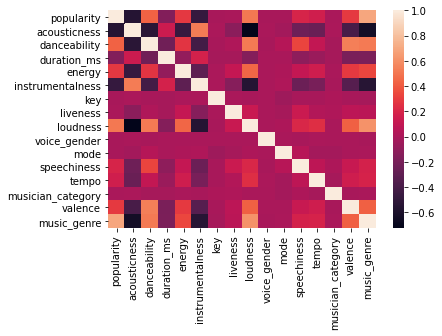

In [28]:
sns.heatmap(data = train_data.corr())

In [29]:
# From the Heatmap & Correlation Matrix, we find the important features which effect the Music_Genre

# Having Correlation of greater than 0.05 or less than -0.05
# Features are: -
# 1. popularity
# 2. acousticness
# 3. danceability
# 4. duration_ms
# 5. energy
# 6. instrumentalness
# 7. loudness
# 8. speechiness
# 9. tempo
# 10. valence
# 11. liveness

In [30]:
features = (crm[((crm['music_genre'] > 0.05) | (crm['music_genre'] < -0.05))].index).values

In [31]:
features

array(['popularity', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'music_genre'], dtype=object)

In [32]:
features = np.delete(features, -1)

In [33]:
features

array(['popularity', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence'], dtype=object)

<AxesSubplot:xlabel='music_genre', ylabel='count'>

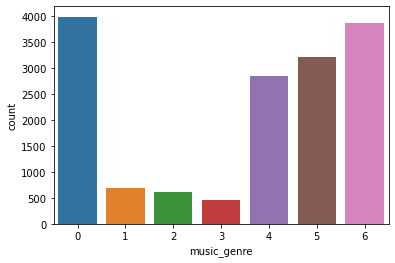

In [34]:
sns.countplot(x = 'music_genre', data = train_data)

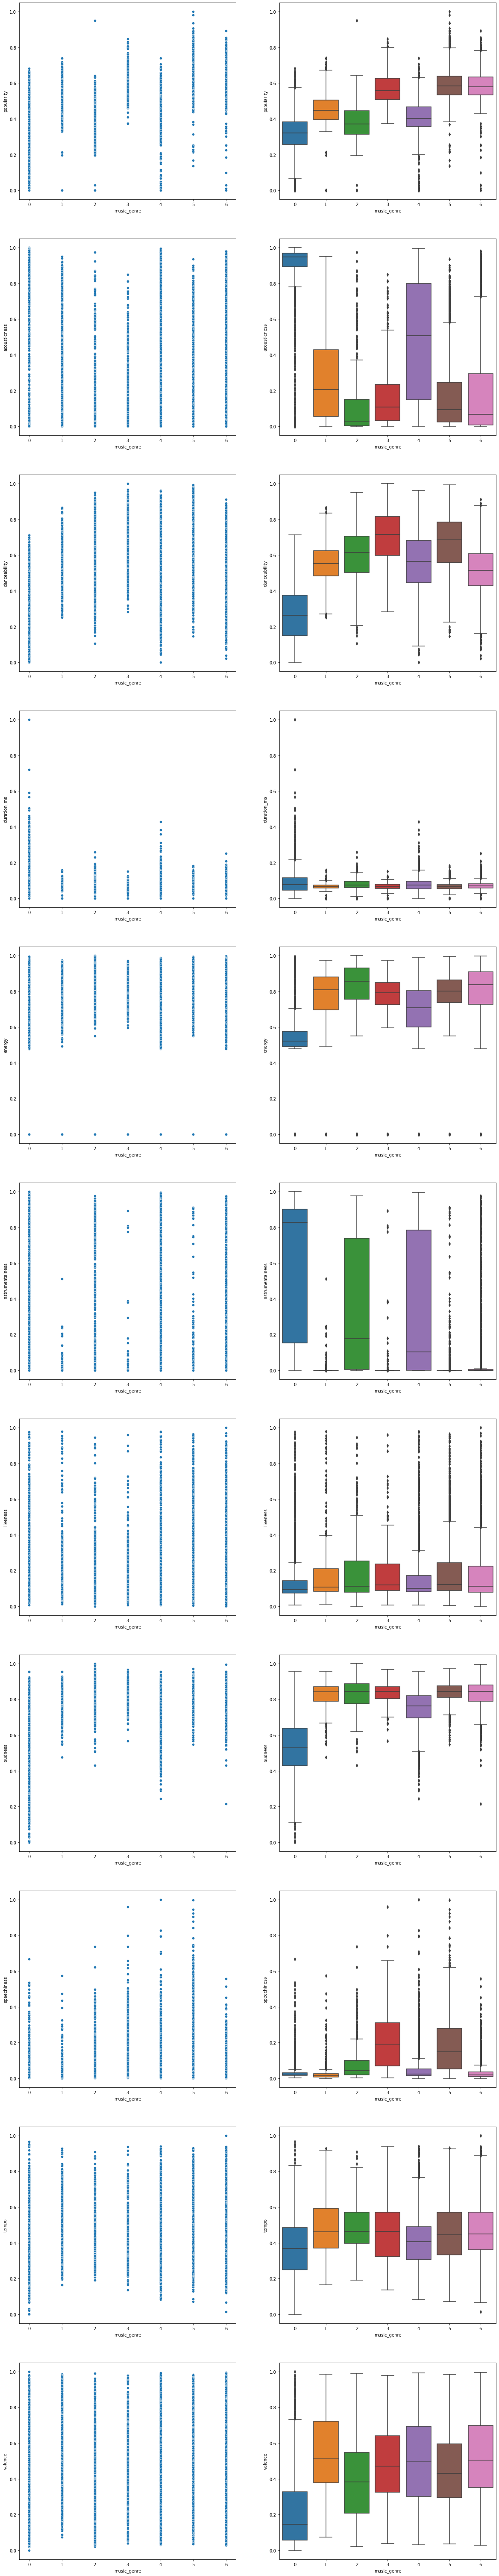

In [35]:
fig, axes = plt.subplots(np.size(features), 2, figsize = (20, 10 * np.size(features)))
for i, f in enumerate(features):
    sns.scatterplot(x = 'music_genre', y = f, data = train_data, ax = axes[i, 0])
    sns.boxplot(x = 'music_genre', y = f, data = train_data, ax = axes[i, 1])


In [36]:
viz_end = time.time()
print("Data Visualization Time", viz_end - viz_start)

Data Visualization Time 4.3304126262664795


### 4. Training Set and Validation Set

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_data[features], train_data['music_genre'], test_size = 0.25, random_state = 11)

In [38]:
X_train.shape, y_train.shape

((11760, 11), (11760,))

In [39]:
X_val.shape, y_val.shape

((3921, 11), (3921,))

In [40]:
X_test = test_data[features]
X_test.shape

(3921, 11)

### 5. Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty = 'l2', C = 1.0, solver = 'lbfgs', max_iter = 300)

In [42]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=300)

In [43]:
print("Training Score", lr.score(X_train, y_train))
print("Validation Score", lr.score(X_val, y_val))

Training Score 0.7323129251700681
Validation Score 0.7452180566182096


In [44]:
hyper_params_lr = pd.read_excel("./LR Hyper Params Tuning.xlsx")

In [45]:
hyper_params_lr.head()

,Penalty,C,Solver,L1_Ratio
0,none,1.00,newton-cg,None
1,l2,0.25,newton-cg,None
2,l2,1.00,newton-cg,None
3,l2,16.00,newton-cg,None
4,none,1.00,lbfgs,None


In [46]:
lr_start = time.time()

In [47]:
training_score = []
validation_score = []
for i, row in hyper_params_lr.iterrows():
    lr = LogisticRegression(penalty = f"{row['Penalty']}", C = row['C'], solver = f"{row['Solver']}", l1_ratio = row['L1_Ratio'], max_iter = 500)
    lr.fit(X_train, y_train)
    training_score.append(lr.score(X_train, y_train))
    validation_score.append(lr.score(X_val, y_val))

C:\Users\805313\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))
C:\Users\805313\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\805313\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\805313\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\805313\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when pena

In [48]:
lr_end = time.time()
print("Logistic Regression Best Model Searching Time", lr_end - lr_start)

Logistic Regression Best Model Searching Time 29.732465267181396


In [49]:
hyper_params_lr['Training_Score'] = np.array(training_score)
hyper_params_lr['Validation_Score'] = np.array(validation_score)

In [50]:
lr_best_params = hyper_params_lr[(hyper_params_lr['Validation_Score'] == hyper_params_lr.Validation_Score.max())]

In [51]:
lr_best_params

,Penalty,C,Solver,L1_Ratio,Training_Score,Validation_Score
28,l1,1.0,saga,None,0.736905,0.75593


In [52]:
lr_best_model = LogisticRegression(penalty = lr_best_params['Penalty'].values[0], C = lr_best_params['C'].values[0], 
                                   solver = lr_best_params['Solver'].values[0], max_iter = 500,
                                   l1_ratio = lr_best_params['L1_Ratio'].values[0])

In [53]:
lr_best_model.fit(X_train, y_train)

C:\Users\805313\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


LogisticRegression(l1_ratio='None', max_iter=500, penalty='l1', solver='saga')

In [54]:
lr_best_model.score(X_val, y_val)

0.75592960979342

In [55]:
lr_f1_score = metrics.f1_score(y_val, lr_best_model.predict(X_val), average = 'macro')

In [56]:
lr_f1_score

0.5499414535383998

### 6. Naive Bayes Classifier

In [57]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

mnb = MultinomialNB(alpha = 0.25)
gnb = GaussianNB()
bnb = BernoulliNB(alpha = 100)

In [58]:
print("Gaussian Naive Bayes")

gnb.fit(X_train, y_train)
print("Training Score", gnb.score(X_train, y_train))
print("Validation Score", gnb.score(X_val, y_val))

Gaussian Naive Bayes
Training Score 0.6634353741496599
Validation Score 0.6801836266258607


In [59]:
print("Multinomial Naive Bayes")

mnb.fit(X_train, y_train)
print("Training Score", mnb.score(X_train, y_train))
print("Validation Score", mnb.score(X_val, y_val))

Multinomial Naive Bayes
Training Score 0.5877551020408164
Validation Score 0.6080081611833716


In [60]:
print("Bernoulli Naive Bayes")

bnb.fit(X_train, y_train)
print("Training Score", bnb.score(X_train, y_train))
print("Validation Score", bnb.score(X_val, y_val))

Bernoulli Naive Bayes
Training Score 0.3741496598639456
Validation Score 0.381280285641418


#### Bad Performance by Naive Bayes!!!

### 7. k Nearest Neighbor

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
K = np.arange(2, 21)

In [63]:
knn_start = time.time()

In [64]:
training_score = []
validation_score = []
for i in K:
    knn = KNeighborsClassifier(n_neighbors = i) 
    knn.fit(X_train, y_train)
    training_score.append(knn.score(X_train, y_train))
    validation_score.append(knn.score(X_val, y_val))

In [65]:
knn_end = time.time()
print("k Nearest Neighbors Best Model Searching Time", knn_end - knn_start)

k Nearest Neighbors Best Model Searching Time 35.717782497406006


In [66]:
hyper_params_knn = pd.DataFrame({'No of Neighbors' : K, 'Training Score' : np.array(training_score), 'Validation Score' : np.array(validation_score)}, columns = ['No of Neighbors', 'Training Score', 'Validation Score'])

In [67]:
hyper_params_knn[(hyper_params_knn['Validation Score'] == hyper_params_knn['Validation Score'].max())]

,No of Neighbors,Training Score,Validation Score
10,12,0.751616,0.737312


In [68]:
knn_best_params = hyper_params_knn[(hyper_params_knn['Validation Score'] == hyper_params_knn['Validation Score'].max())]

In [69]:
knn_best_params

,No of Neighbors,Training Score,Validation Score
10,12,0.751616,0.737312


In [70]:
knn_best_model = KNeighborsClassifier(n_neighbors = knn_best_params['No of Neighbors'].values[0])

In [71]:
knn_best_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [72]:
knn_best_model.score(X_val, y_val)

0.737311910226983

In [73]:
knn_f1_score = metrics.f1_score(y_val, knn_best_model.predict(X_val), average = 'macro')

In [74]:
knn_f1_score

0.5280650650340598

### 8. Support Vector Machines

In [75]:
from sklearn.svm import SVC

In [76]:
params = [
    {
        'kernel' : ['linear', 'rbf', 'poly', 'sigmoid'],
        'C' : [0.23, 1.3, 10.7, 100.1]
    }
]

#### Grid Search
- Finding the right set of hyperparameters

In [77]:
cpus = multiprocessing.cpu_count()
print(cpus)

8


In [78]:
gs = GridSearchCV(estimator = SVC(), param_grid = params, scoring = ['accuracy', 'f1_macro'], cv = 5, n_jobs = cpus, refit = 'f1_macro')

In [79]:
svm_start = time.time()

In [80]:
gs.fit(np.array(train_data[features]), np.array(train_data['music_genre']))

GridSearchCV(cv=5, estimator=SVC(), n_jobs=8,
             param_grid=[{'C': [0.23, 1.3, 10.7, 100.1],
                          'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}],
             refit='f1_macro', scoring=['accuracy', 'f1_macro'])

In [81]:
svm_end = time.time()
print("Support Vector Machine Best Model Searching Time", svm_end - svm_start)

Support Vector Machine Best Model Searching Time 1140.2291572093964


In [82]:
hyper_params_svc = pd.DataFrame(gs.cv_results_)

In [83]:
hyper_params_svc.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,std_test_accuracy,rank_test_accuracy,split0_test_f1_macro,split1_test_f1_macro,split2_test_f1_macro,split3_test_f1_macro,split4_test_f1_macro,mean_test_f1_macro,std_test_f1_macro,rank_test_f1_macro
0,12.033753,0.386522,2.054504,0.019837,0.23,linear,"{'C': 0.23, 'kernel': 'linear'}",0.735097,0.718112,0.731824,...,0.006740,12,0.480288,0.452268,0.457763,0.433664,0.448541,0.454505,0.015168,12
1,13.635475,1.186556,7.022242,0.118827,0.23,rbf,"{'C': 0.23, 'kernel': 'rbf'}",0.748167,0.729592,0.745536,...,0.007187,11,0.495957,0.485167,0.490298,0.484203,0.501052,0.491335,0.006415,11
2,9.524457,0.225642,2.003447,0.075722,0.23,poly,"{'C': 0.23, 'kernel': 'poly'}",0.758368,0.746173,0.761161,...,0.005214,7,0.549428,0.547441,0.551984,0.550085,0.564426,0.552673,0.006053,7
3,28.787704,0.527476,4.662732,0.163672,0.23,sigmoid,"{'C': 0.23, 'kernel': 'sigmoid'}",0.400383,0.385842,0.395727,...,0.006323,16,0.227746,0.218729,0.222004,0.214897,0.217701,0.220215,0.004398,16
4,8.581048,0.391528,2.028973,0.149925,1.3,linear,"{'C': 1.3, 'kernel': 'linear'}",0.744661,0.737564,0.747768,...,0.003571,10,0.533172,0.526040,0.533551,0.533089,0.538639,0.532898,0.004013,10


In [84]:
hyper_params_svc.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_kernel', 'params', 'split0_test_accuracy',
       'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy',
       'split4_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy',
       'rank_test_accuracy', 'split0_test_f1_macro', 'split1_test_f1_macro',
       'split2_test_f1_macro', 'split3_test_f1_macro', 'split4_test_f1_macro',
       'mean_test_f1_macro', 'std_test_f1_macro', 'rank_test_f1_macro'],
      dtype='object')

In [85]:
hyper_params_svc[hyper_params_svc['rank_test_f1_macro'] == 1][[ 'mean_test_accuracy', 'mean_test_f1_macro']]

,mean_test_accuracy,mean_test_f1_macro
14,0.762196,0.580952


#### Best Performance Achieved Till Now!!!

### 9. Decsision Trees

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
params = [
    {
        'criterion' : ['gini', 'entropy'],
        'splitter' : ['best', 'random'],
        'max_depth' : [4, 8, 16, 32, 64, None]
    }
]

In [88]:
gs = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = params, scoring = ['accuracy', 'f1_macro'], 
                  cv = 5, n_jobs = cpus, refit = 'f1_macro')

In [89]:
dt_start = time.time()

In [90]:
gs.fit(np.array(train_data[features]), np.array(train_data['music_genre']))

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=8,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [4, 8, 16, 32, 64, None],
                          'splitter': ['best', 'random']}],
             refit='f1_macro', scoring=['accuracy', 'f1_macro'])

In [91]:
dt_end = time.time()
print("Decision Trees Best Model Searching Time", dt_end - dt_start)

Decision Trees Best Model Searching Time 22.159080505371094


In [92]:
hyper_params_dt = pd.DataFrame(gs.cv_results_)

In [93]:
hyper_params_dt.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_splitter,params,split0_test_accuracy,split1_test_accuracy,...,std_test_accuracy,rank_test_accuracy,split0_test_f1_macro,split1_test_f1_macro,split2_test_f1_macro,split3_test_f1_macro,split4_test_f1_macro,mean_test_f1_macro,std_test_f1_macro,rank_test_f1_macro
0,0.232146,0.013596,0.008768,0.000361,gini,4,best,"{'criterion': 'gini', 'max_depth': 4, 'splitte...",0.700351,0.692283,...,0.004079,3,0.464137,0.468912,0.417319,0.415569,0.462784,0.445744,0.024016,21
1,0.030017,0.002688,0.008475,0.000797,gini,4,random,"{'criterion': 'gini', 'max_depth': 4, 'splitte...",0.623207,0.625000,...,0.015870,23,0.364307,0.372830,0.334624,0.394403,0.362002,0.365633,0.019267,23
2,0.444004,0.013545,0.008402,0.000494,gini,8,best,"{'criterion': 'gini', 'max_depth': 8, 'splitte...",0.744979,0.724809,...,0.006989,1,0.552318,0.542897,0.546493,0.530247,0.570641,0.548519,0.013217,1
3,0.043897,0.004473,0.011146,0.004333,gini,8,random,"{'criterion': 'gini', 'max_depth': 8, 'splitte...",0.701945,0.687181,...,0.017263,7,0.480802,0.433645,0.455247,0.448729,0.450921,0.453869,0.015306,20
4,0.648552,0.018136,0.009733,0.000767,gini,16,best,"{'criterion': 'gini', 'max_depth': 16, 'splitt...",0.685368,0.685268,...,0.003824,5,0.529581,0.527070,0.520021,0.533481,0.525567,0.527144,0.004457,3


In [94]:
hyper_params_dt[hyper_params_dt['rank_test_f1_macro'] == 1][[ 'mean_test_accuracy', 'mean_test_f1_macro']]

,mean_test_accuracy,mean_test_f1_macro
2,0.735029,0.548519


### 10. Random Forests Classifier

In [95]:
from sklearn.ensemble import RandomForestClassifier


In [96]:
params = [
    {
        'criterion' : ['gini', 'entropy'],
        'max_depth' : [4, 8, 16, 32, 64, None],
        'bootstrap' : [True],
        'max_samples' : [0.75]
    }
]

In [97]:
gs = GridSearchCV(estimator = RandomForestClassifier(), param_grid = params, scoring = ['accuracy', 'f1_macro'], 
                  cv = 5, n_jobs = cpus, refit = 'f1_macro')

In [98]:
rfc_start = time.time()

In [99]:
gs.fit(np.array(train_data[features]), np.array(train_data['music_genre']))

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=8,
             param_grid=[{'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                          'max_depth': [4, 8, 16, 32, 64, None],
                          'max_samples': [0.75]}],
             refit='f1_macro', scoring=['accuracy', 'f1_macro'])

In [100]:
rfc_end = time.time()
print("Random Forest Classifier Best Model Searching Time", rfc_end - rfc_start)

Random Forest Classifier Best Model Searching Time 137.22971200942993


In [101]:
hyper_params_rfc = pd.DataFrame(gs.cv_results_)

In [102]:
hyper_params_rfc.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_max_samples,params,split0_test_accuracy,...,std_test_accuracy,rank_test_accuracy,split0_test_f1_macro,split1_test_f1_macro,split2_test_f1_macro,split3_test_f1_macro,split4_test_f1_macro,mean_test_f1_macro,std_test_f1_macro,rank_test_f1_macro
0,4.475091,0.804838,0.131687,0.011310,True,gini,4,0.75,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.731272,...,0.006872,11,0.437225,0.425496,0.428309,0.430842,0.426812,0.429737,0.004144,11
1,7.179512,0.618725,0.167590,0.020980,True,gini,8,0.75,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.778132,...,0.009022,10,0.570546,0.542000,0.571379,0.567660,0.565692,0.563455,0.010919,10
2,10.702546,0.210179,0.302390,0.084611,True,gini,16,0.75,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.783870,...,0.007956,5,0.593715,0.580186,0.602880,0.598223,0.598660,0.594733,0.007831,7
3,11.002710,0.777217,0.220271,0.032935,True,gini,32,0.75,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.785145,...,0.006553,8,0.597263,0.583871,0.607004,0.593455,0.593042,0.594927,0.007474,5
4,10.425477,0.404129,0.227536,0.017486,True,gini,64,0.75,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.785464,...,0.008044,2,0.599990,0.578616,0.603756,0.600759,0.597122,0.596049,0.008969,3


In [103]:
hyper_params_rfc[hyper_params_rfc['rank_test_f1_macro'] == 1][[ 'mean_test_accuracy', 'mean_test_f1_macro']]

,mean_test_accuracy,mean_test_f1_macro
10,0.780116,0.596683


### 11. Multi Layer Perceptrons

In [104]:
from sklearn.neural_network import MLPClassifier

In [105]:
params = [
    {
        'activation' : ['logistic', 'tanh', 'relu'],
        'early_stopping' : [True],
        'solver' : ['lbfgs', 'sgd', 'adam'],
        'hidden_layer_sizes' : [(64, 32), (32, 16), (16,)]
    }
]

In [106]:
gs = GridSearchCV(estimator = MLPClassifier(max_iter = 500), param_grid = params, scoring = ['accuracy', 'f1_macro'], 
            cv = 3, n_jobs = cpus, refit = 'f1_macro')

In [107]:
mlp_start = time.time()

In [108]:
gs.fit(np.array(train_data[features]), np.array(train_data['music_genre']))

C:\Users\805313\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=500), n_jobs=8,
             param_grid=[{'activation': ['logistic', 'tanh', 'relu'],
                          'early_stopping': [True],
                          'hidden_layer_sizes': [(64, 32), (32, 16), (16,)],
                          'solver': ['lbfgs', 'sgd', 'adam']}],
             refit='f1_macro', scoring=['accuracy', 'f1_macro'])

In [109]:
mlp_end = time.time()
print("Multilayer Perceptron Best Model Searching Time", mlp_end - mlp_start)

Multilayer Perceptron Best Model Searching Time 288.2804093360901


In [110]:
hyper_params_mlp = pd.DataFrame(gs.cv_results_)

In [111]:
hyper_params_mlp.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_early_stopping,param_hidden_layer_sizes,param_solver,params,split0_test_accuracy,...,split2_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_f1_macro,split1_test_f1_macro,split2_test_f1_macro,mean_test_f1_macro,std_test_f1_macro,rank_test_f1_macro
0,65.686785,0.955968,0.043335,0.001863,logistic,True,"(64, 32)",lbfgs,"{'activation': 'logistic', 'early_stopping': T...",0.764492,...,0.770614,0.767489,0.002501,5,0.575206,0.583180,0.594966,0.584451,0.008117,5
1,2.159230,0.110950,0.045130,0.005085,logistic,True,"(64, 32)",sgd,"{'activation': 'logistic', 'early_stopping': T...",0.247369,...,0.254448,0.252089,0.003337,27,0.056661,0.057953,0.057953,0.057522,0.000609,27
2,15.645393,0.670105,0.048298,0.008697,logistic,True,"(64, 32)",adam,"{'activation': 'logistic', 'early_stopping': T...",0.722403,...,0.727951,0.727377,0.003849,16,0.434209,0.438757,0.436699,0.436555,0.001860,17
3,38.787321,1.263753,0.031930,0.005863,logistic,True,"(32, 16)",lbfgs,"{'activation': 'logistic', 'early_stopping': T...",0.765066,...,0.759901,0.765002,0.004140,8,0.573471,0.584845,0.574781,0.577699,0.005081,8
4,2.648549,0.862823,0.028374,0.002070,logistic,True,"(32, 16)",sgd,"{'activation': 'logistic', 'early_stopping': T...",0.254448,...,0.254448,0.318730,0.090908,26,0.057953,0.179210,0.057953,0.098372,0.057161,26


In [112]:
hyper_params_mlp[hyper_params_mlp['rank_test_f1_macro'] == 1][[ 'mean_test_accuracy', 'mean_test_f1_macro']]

,mean_test_accuracy,mean_test_f1_macro
9,0.771316,0.595058


### Best Performance has been achieved by Random Forest Classifier.

In [113]:
best_model_params = hyper_params_rfc[hyper_params_rfc['rank_test_f1_macro'] == 1]

In [114]:
best_model_params

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_max_samples,params,split0_test_accuracy,...,std_test_accuracy,rank_test_accuracy,split0_test_f1_macro,split1_test_f1_macro,split2_test_f1_macro,split3_test_f1_macro,split4_test_f1_macro,mean_test_f1_macro,std_test_f1_macro,rank_test_f1_macro
10,23.173554,1.513983,0.198624,0.00583,True,entropy,64,0.75,"{'bootstrap': True, 'criterion': 'entropy', 'm...",0.783232,...,0.006942,4,0.592917,0.584278,0.608942,0.597857,0.599422,0.596683,0.00809,1


In [115]:
best_model = RandomForestClassifier(bootstrap = True, max_samples = 0.75, 
                                    criterion = best_model_params['param_criterion'].values[0], 
                                    max_depth = best_model_params['param_max_depth'].values[0])

In [116]:
best_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=64, max_samples=0.75)

In [117]:
best_model.score(X_train, y_train)

0.9987244897959183

In [118]:
best_model.score(X_val, y_val)

0.7842387146136189

In [119]:
metrics.f1_score(y_val, best_model.predict(X_val), average = 'macro')

0.6025861800859789

In [120]:
predicted_labels = best_model.predict(X_test)

In [121]:
predicted_genres = le_mg.inverse_transform(predicted_labels)

In [122]:
predicted_genres

array(['Classical', 'Rock', 'Rock', ..., 'Classical', 'Country', 'Jazz'],
      dtype=object)

In [123]:
test_index = test_data['instance_id']

In [124]:
test_index

0       MSC_70753.0
1       MSC_24064.0
2       MSC_22731.0
3       MSC_32095.0
4       MSC_24198.0
           ...     
3916    MSC_80955.0
3917    MSC_72767.0
3918    MSC_40192.0
3919    MSC_56067.0
3920    MSC_90169.0
Name: instance_id, Length: 3921, dtype: object

In [125]:
pred_df = pd.DataFrame({'instance_id' : test_index, 'music_genre' : predicted_genres}, columns = ['instance_id', 'music_genre'])

In [126]:
pred_df

,instance_id,music_genre
0,MSC_70753.0,Classical
1,MSC_24064.0,Rock
2,MSC_22731.0,Rock
3,MSC_32095.0,Rock
4,MSC_24198.0,Jazz
...,...,...
3916,MSC_80955.0,Classical
3917,MSC_72767.0,Rock
3918,MSC_40192.0,Classical
3919,MSC_56067.0,Country


In [127]:
pred_df.to_csv("best_model_results.csv")

In [128]:
notebook_end = time.time()
print("Notebook Execution Time", notebook_end - notebook_start)

Notebook Execution Time 1680.1471560001373


### Random Forest Classifier leads to OverFitting

In [129]:
params = [
    {
        'criterion' : ['gini', 'entropy'],
        'max_depth' : [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
    }
]

In [130]:
gs = GridSearchCV(estimator = RandomForestClassifier(), param_grid = params, scoring = ['accuracy', 'f1_macro'], 
                  cv = 5, n_jobs = cpus, refit = 'f1_macro', return_train_score = True)

In [131]:
rfc_start = time.time()

In [132]:
gs.fit(np.array(train_data[features]), np.array(train_data['music_genre']))

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=8,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                        15]}],
             refit='f1_macro', return_train_score=True,
             scoring=['accuracy', 'f1_macro'])

In [133]:
rfc_end = time.time()
print("Random Forest Classifier Best Model Searching Time", rfc_end - rfc_start)

Random Forest Classifier Best Model Searching Time 258.79446601867676


In [134]:
hyper_params_rfc = pd.DataFrame(gs.cv_results_)

In [135]:
hyper_params_rfc.to_csv("hyper_params.csv")

#### We see that for criterion: 'entropy' and max_depth: 7
#### The Random Forest model gives a good generalization

In [136]:
best_generalized_model = RandomForestClassifier(criterion = 'entropy', max_depth = 7, bootstrap = True, max_samples = 0.75)

In [137]:
best_generalized_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, max_samples=0.75)

In [138]:
best_generalized_model.score(X_train, y_train)

0.7814625850340136

In [139]:
best_generalized_model.score(X_val, y_val)

0.7725070135169599

In [140]:
metrics.f1_score(y_val, best_generalized_model.predict(X_val), average = 'macro')

0.5533821191160436

In [141]:
predicted_labels = best_generalized_model.predict(X_test)

In [142]:
predicted_genres = le_mg.inverse_transform(predicted_labels)

In [143]:
predicted_genres

array(['Classical', 'Rock', 'Rock', ..., 'Classical', 'Rock', 'Jazz'],
      dtype=object)

In [144]:
test_index = test_data['instance_id']

In [145]:
test_index

0       MSC_70753.0
1       MSC_24064.0
2       MSC_22731.0
3       MSC_32095.0
4       MSC_24198.0
           ...     
3916    MSC_80955.0
3917    MSC_72767.0
3918    MSC_40192.0
3919    MSC_56067.0
3920    MSC_90169.0
Name: instance_id, Length: 3921, dtype: object

In [146]:
pred_df = pd.DataFrame({'instance_id' : test_index, 'music_genre' : predicted_genres}, columns = ['instance_id', 'music_genre'])

In [147]:
pred_df

,instance_id,music_genre
0,MSC_70753.0,Classical
1,MSC_24064.0,Rock
2,MSC_22731.0,Rock
3,MSC_32095.0,Rock
4,MSC_24198.0,Jazz
...,...,...
3916,MSC_80955.0,Classical
3917,MSC_72767.0,Rock
3918,MSC_40192.0,Classical
3919,MSC_56067.0,Rock


In [148]:
pred_df.to_csv("best_generalized_model_results.csv")